In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from solvers import quad_solve
from solvers import iter_solve

Решить уравнение (оно в тетрадке записано) c параметрами $$\lambda = 1, \beta = -1, A = -1$$

$$y(x) = e^{x} + \int\limits_0^x e^{x - t} f(t)dt$$

Аналитическое решение:

$$2 e^x$$

Решим численно, запишем ядро, правую часть

In [34]:
x_ax = np.linspace(0,1)

ker = lambda xn, tn : np.exp(xn - tn)
kernel = np.zeros((len(x_ax), len(x_ax)))

for i in range(len(x_ax)):
    for j in range(i + 1):
        kernel[i, j] = ker(x_ax[i], x_ax[j])
        
right_part = np.exp(x_ax)

Сперва решим итерационно

Квадратурно

In [35]:
analytical = 2 * np.exp(x_ax)
solution_quad, _ = quad_solve(right_part, kernel, iterations=10, analytical=analytical)

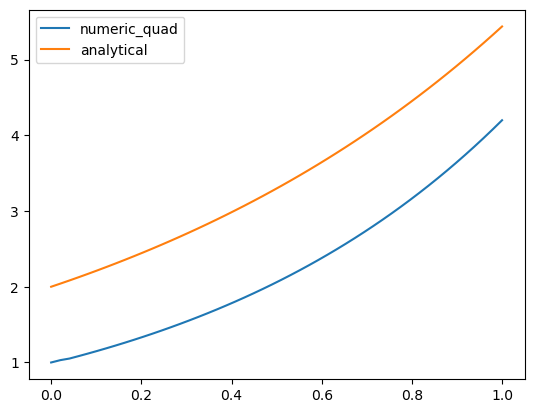

In [36]:
plt.plot(x_ax, solution_quad, label='numeric_quad')
plt.plot(x_ax, analytical, label='analytical')
plt.legend()
plt.show()

Видим, что есть сдвиг в константу, который зависит от начального приближения

Посмотрим ошибку от числа итераций

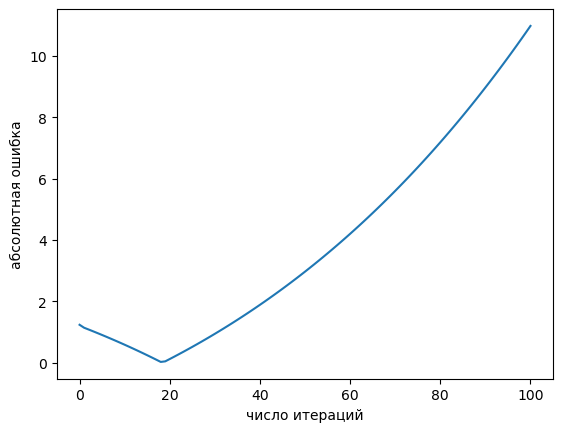

In [37]:
_, error_quad = quad_solve(right_part, kernel, iterations=100, analytical=analytical)
plt.plot(range(len(error_quad)), error_quad)
plt.xlabel('число итераций')
plt.ylabel('абсолютная ошибка')
plt.show()

Простые итерации

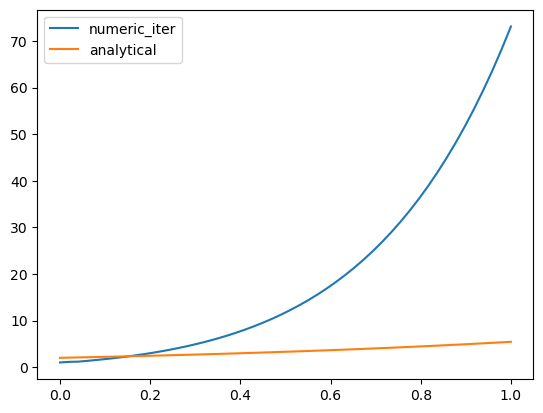

In [38]:
solution_iter, _ = iter_solve(right_part, kernel, iterations=1, analytical=analytical)
plt.plot(x_ax, solution_iter, label='numeric_iter')
plt.plot(x_ax, analytical, label='analytical')
plt.legend()
plt.show()

Методом простых итераций почему-то решение растёт очень быстро

In [39]:
_, error_iter = iter_solve(right_part, kernel, iterations=100, analytical=analytical)

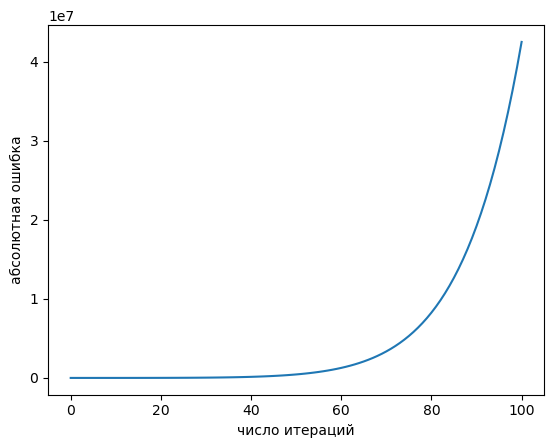

In [40]:
plt.plot(range(len(error_iter)), error_iter)
plt.xlabel('число итераций')
plt.ylabel('абсолютная ошибка')
plt.show()

Ошибка растёт всегда и делает это экспоненциально

Теперь попробуем добавить случайный шум в $f(x)$

In [45]:
noise = np.random.normal(scale=0.00, size=len(right_part))
right_noisy = noise + right_part

In [46]:
quad_noisy, _ = quad_solve(right_part, kernel, iterations=1, analytical=analytical)

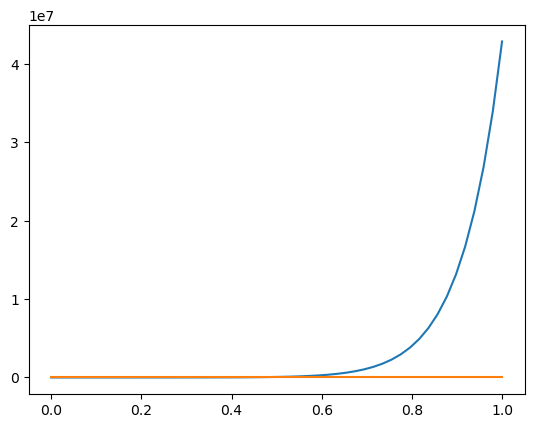

In [47]:
plt.plot(x_ax, quad_noisy, label='quad noisy')
plt.plot(x_ax, analytical, label='analytical')